# Student Performance Prediction
This notebook trains two models:
1. Predicts the average score (Regression)
2. Predicts the grade (Multiclass Classification)

In [2]:
pip install pandas matplotlib scikit-learn 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\sanam\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("student_performance_expanded.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,grade
0,female,group B,high school,standard,none,61,89,64,71.333333,C
1,male,group B,associate's degree,free/reduced,completed,22,33,85,46.666667,F
2,female,group D,some college,standard,completed,8,6,16,10.000000,F
3,female,group B,bachelor's degree,free/reduced,completed,11,67,70,49.333333,F
4,female,group B,associate's degree,standard,none,0,57,88,48.333333,F


In [6]:
# Prepare features and targets
X = df.drop(columns=['math score', 'reading score', 'writing score', 'average', 'grade'])
y_avg = df['average']
y_grade = df['grade']

# Encode categorical features
X_encoded = X.apply(LabelEncoder().fit_transform)

In [7]:
# Regression: Predicting average score
X_train_avg, X_test_avg, y_train_avg, y_test_avg = train_test_split(X_encoded, y_avg, test_size=0.2, random_state=42)
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train_avg, y_train_avg)
y_pred_avg = regressor.predict(X_test_avg)
mae = mean_absolute_error(y_test_avg, y_pred_avg)
print(f"Mean Absolute Error for Average Score Prediction: {mae:.2f}")

Mean Absolute Error for Average Score Prediction: 15.28


In [6]:
# Classification: Predicting grades
X_train_grade, X_test_grade, y_train_grade, y_test_grade = train_test_split(X_encoded, y_grade, test_size=0.2, random_state=42)
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_grade, y_train_grade)
y_pred_grade = classifier.predict(X_test_grade)
accuracy = accuracy_score(y_test_grade, y_pred_grade)
print(f"Accuracy for Grade Prediction: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test_grade, y_pred_grade))

Accuracy for Grade Prediction: 0.70
Classification Report:
               precision    recall  f1-score   support

           C       1.00      0.20      0.33         5
           D       0.00      0.00      0.00         1
           F       0.72      0.93      0.81        14

    accuracy                           0.70        20
   macro avg       0.57      0.38      0.38        20
weighted avg       0.76      0.70      0.65        20



## Model Evaluation: Accuracy and Confusion Matrix
Below we evaluate the classification model's performance with a confusion matrix.

In [7]:
# Accuracy and Classification Report
print(f"Accuracy for Grade Prediction: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test_grade, y_pred_grade))

Accuracy for Grade Prediction: 0.70
Classification Report:
               precision    recall  f1-score   support

           C       1.00      0.20      0.33         5
           D       0.00      0.00      0.00         1
           F       0.72      0.93      0.81        14

    accuracy                           0.70        20
   macro avg       0.57      0.38      0.38        20
weighted avg       0.76      0.70      0.65        20



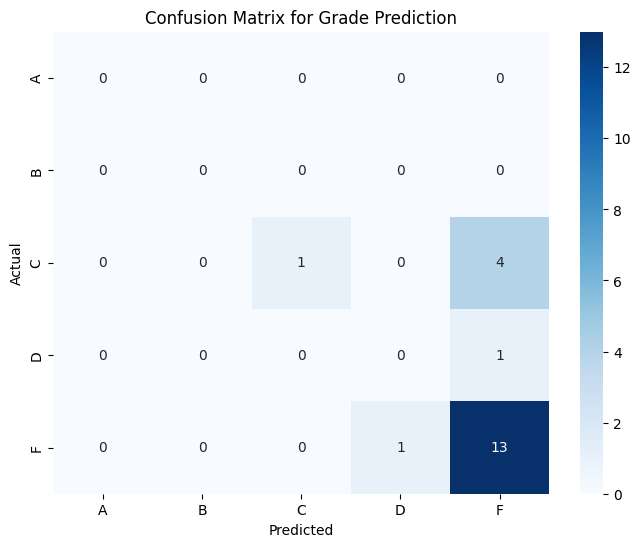

In [14]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test_grade, y_pred_grade, labels=classifier.classes_)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Grade Prediction')
plt.show()

## Predicting a New Student's Grade and Average Score
Enter a new student's details below to predict their expected performance.

In [16]:
# Example student input
new_student = {
    'gender': 'female',
    'race/ethnicity': 'group C',
    'parental level of education': "bachelor's degree",
    'lunch': 'standard',
    'test preparation course': 'completed'
}

In [17]:
# Convert to DataFrame and encode
new_df = pd.DataFrame([new_student])

# Encode using the same logic as training
for col in new_df.columns:
    le = LabelEncoder()
    le.fit(df[col])  # Use training data to fit encoder
    new_df[col] = le.transform(new_df[col])

In [18]:
# Predict average score and grade
predicted_avg = regressor.predict(new_df)
predicted_grade = classifier.predict(new_df)

print(f"Predicted Average Score: {predicted_avg[0]:.2f}")
print(f"Predicted Grade: {predicted_grade[0]}")

Predicted Average Score: 31.74
Predicted Grade: F
